# ENV

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# train, test data label count

In [3]:
# 필요 시 경로 수정
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')


In [4]:
train_df

,id,sentence,subject_entity,object_entity,label
0,0,"각 코볼 프로그램은 4개의 어휘 항목을 이룬다; 워드, 리터럴, 픽처(PICTURE...","{'word': '픽처', 'start': 347, 'end': 348, 'type...","{'word': 'PICTURE', 'start': 350, 'end': 356, ...",com:alternative_names
1,1,"알골과 같은 언어가 절차적 프로그래밍 언어의 표준적인 예이다. 그 밖에 포트란, P...","{'word': '절차적 프로그래밍 언어', 'start': 1562, 'end':...","{'word': '포트란', 'start': 1591, 'end': 1593, 't...",com:sub_concept
2,2,"처럼 현대의 간결한 문법과 달리, 코볼은 더욱 영어와 같은 문법을 갖고 있다. (이...","{'word': '디비전', 'start': 901, 'end': 903, 'typ...","{'word': 'PROCEDURE', 'start': 940, 'end': 948...",com:sub_concept
3,3,"비주얼 스튜디오 2003의 네 가지 에디션은 아카데믹, 프로페셔널, 엔터프라이즈 디...","{'word': '비주얼 스튜디오 2003', 'start': 2277, 'end'...","{'word': '아카데믹', 'start': 2302, 'end': 2305, '...",com:sub_concept
4,4,유닉스는 어셈블리가 아닌 언어로 구현된 최초의 운영체제 커널 중의 하나였다.(더 빠...,"{'word': '리치', 'start': 1162, 'end': 1163, 'ty...","{'word': '스티븐 C. 존슨', 'start': 1166, 'end': 11...",no_relation
...,...,...,...,...,...
1525,1525,"반면, 2003년 코볼은 미국에서 정보 시스템 교육과정의 80%에 특별히 포함되었는...","{'word': '자바', 'start': 2882, 'end': 2883, 'ty...","{'word': 'C++', 'start': 2877, 'end': 2879, 't...",com:similar_technology
1526,1526,각각의 상태 변화를 분리하여 하위프로그램을 만들고 변수를 이용하여 활동중인 상태를 ...,"{'word': '카누스', 'start': 4417, 'end': 4419, 't...","{'word': '프로그래머', 'start': 4429, 'end': 4433, ...",per:title
1527,1527,장점은 한번 컴파일된 바이트 코드는 다른 플랫폼에서 재컴파일없이 실행할 수 있다.,"{'word': '바이트 코드', 'start': 1650, 'end': 1655,...","{'word': '플랫폼', 'start': 1661, 'end': 1663, 't...",no_relation
1528,1528,"포트란은 컴파일 언어였는데, 변수의 이름을 붙일 수 있고, 복잡한 수식을 계산할 수...","{'word': '컴파일 언어', 'start': 1341, 'end': 1346,...","{'word': '포트란', 'start': 1336, 'end': 1338, 't...",com:sub_concept


In [5]:
test_df

,id,sentence,subject_entity,object_entity,label
0,0,"리눅스 및 유닉스 계열 운영 체제에서는 X 윈도 시스템을 주로 사용하며, 모티프, ...","{'word': '모티프', 'start': 714, 'end': 716, 'typ...","{'word': 'Qt', 'start': 719, 'end': 720, 'type...",com:similar_technology
1,1,그 해의 나중에 DPMA(Data Processing Management Assoc...,"{'word': 'DPMA', 'start': 2034, 'end': 2037, '...","{'word': '표준', 'start': 2088, 'end': 2089, 'ty...",no_relation
2,2,"FORTRAN77까지 초기의 버전은 그 이름에 대문자를 사용하였으나, 현재는 For...","{'word': 'Fortran', 'start': 961, 'end': 967, ...","{'word': 'FORTRAN77', 'start': 918, 'end': 926...",com:prior_technology
3,3,"2003년과 2009년 사이에 3개의 기술 보고서가 생산되었으며, 코볼을 위한 오브...","{'word': '기술 보고서', 'start': 3413, 'end': 3418,...","{'word': '콜렉션 클래스', 'start': 3474, 'end': 3480...",com:sub_concept
4,4,"색인 파일들의 구현체들은 업체에 따라 다르지만, C?ISAM와 VSAM과 같은 공통...","{'word': 'IBM', 'start': 1146, 'end': 1148, 't...","{'word': 'ISAM', 'start': 1151, 'end': 1154, '...",org:production
...,...,...,...,...,...
642,642,두 개의 개정안이 1989년(내장 함수 도입)과 1993년(기타 수정 사항 제공)에...,"{'word': '개정안', 'start': 2738, 'end': 2740, 't...","{'word': '기타 수정 사항 제공', 'start': 2766, 'end': ...",com:sub_concept
643,643,PROCEDURE DIVISION(통틀어 프로시저로 호칭)에 위치한 섹션과 문단은 ...,"{'word': '섹션', 'start': 2469, 'end': 2470, 'ty...","{'word': '레이블', 'start': 2477, 'end': 2479, 't...",no_relation
644,644,"인자 전달에 있어서 알골에 특징적이었던 ""이름 전달"" 방식도 이후의 언어에서는 거의...","{'word': '알골', 'start': 477, 'end': 478, 'type...","{'word': '""이름 전달"" 방식', 'start': 488, 'end': 49...",com:sub_concept
645,645,"예를 들면 파이썬 2에서 빌트인 파일 객체들은 ""C의codice_40패키지를 사용해...","{'word': '사용 가능한 연산', 'start': 3871, 'end': 38...","{'word': 'write', 'start': 3894, 'end': 3898, ...",com:sub_concept


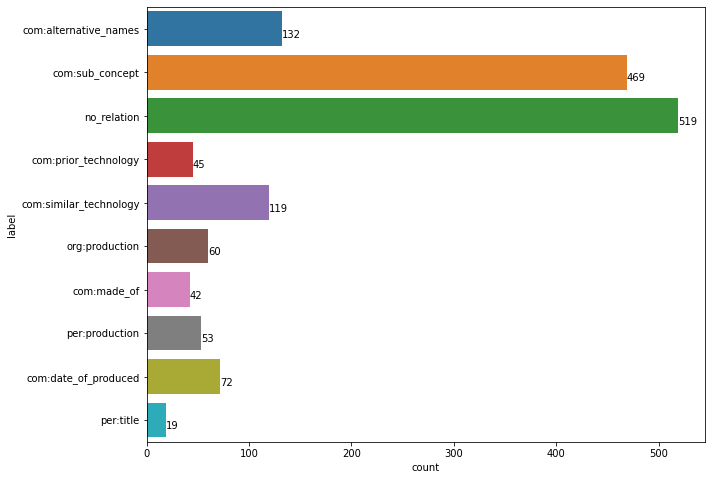

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.countplot(y='label', data=train_df, ax=ax)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+0.6), fontsize=10)

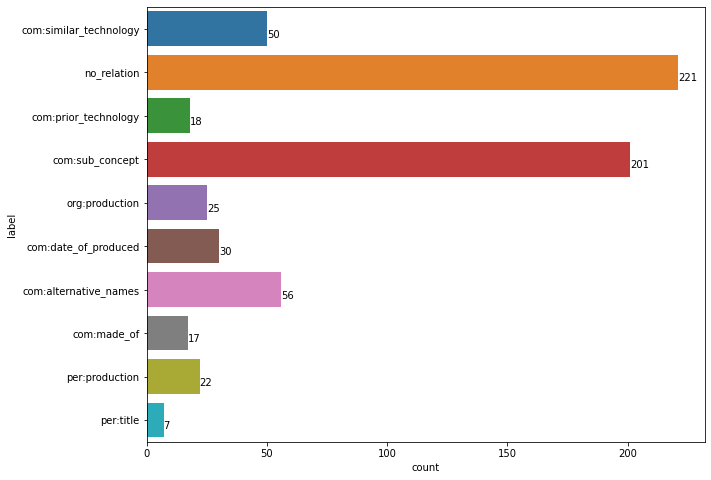

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.countplot(y='label', data=test_df, ax=ax)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+0.6), fontsize=10)

# prediction, answer 분석

In [8]:
df = pd.read_csv('/content/submission.csv')

In [9]:
df = df.set_index("id")

In [10]:
df

,pred_label,answer
id,,
0,com:similar_technology,com:similar_technology
1,no_relation,no_relation
2,com:alternative_names,com:prior_technology
3,com:sub_concept,com:sub_concept
4,org:production,org:production
...,...,...
642,com:prior_technology,com:sub_concept
643,no_relation,no_relation
644,no_relation,com:sub_concept


In [11]:
classes = {"no_relation":[0,0],"per:production":[0,0],"per:title":[0,0],"org:production":[0,0],
           "com:date_of_produced":[0,0],"com:sub_concept":[0,0],"com:alternative_names":[0,0],
           "com:made_of":[0,0],"com:prior_technology":[0,0],"com:similar_technology":[0,0]}

for data in zip(df['pred_label'], df['answer']):
    pred, label = data
    classes[pred][-1] += 1
    if pred == label:
      classes[pred][0] += 1

total, cor = 0, 0
for i in classes:
    total += classes[i][-1]
    cor += classes[i][0]
    print('Accuracy of %25s : %2d %%' % (i, 100 * classes[i][0] / classes[i][-1]))

print('Accuracy of %25s : %2d %%' % ("total", 100 *  cor/total))

Accuracy of               no_relation : 76 %
Accuracy of            per:production : 91 %
Accuracy of                 per:title : 85 %
Accuracy of            org:production : 70 %
Accuracy of      com:date_of_produced : 93 %
Accuracy of           com:sub_concept : 74 %
Accuracy of     com:alternative_names : 76 %
Accuracy of               com:made_of : 25 %
Accuracy of      com:prior_technology : 38 %
Accuracy of    com:similar_technology : 70 %
Accuracy of                     total : 74 %


In [12]:
classes = {"no_relation":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "per:production":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "per:title":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "org:production":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:date_of_produced":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:sub_concept":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:alternative_names":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:made_of":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:prior_technology":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0],
           "com:similar_technology":[{"no_relation":0,"per:production":0,"per:title":0,"org:production":0, "com:date_of_produced":0,"com:sub_concept":0,"com:alternative_names":0, "com:made_of":0,"com:prior_technology":0,"com:similar_technology":0},0]}

for data in zip(df['pred_label'], df['answer']):
    pred, label = data
    classes[label][-1] += 1
    classes[label][0][pred] += 1

total = 0
for i in classes:
    total += classes[i][-1]
    # cor += classes[i][0]
    print('Top3 prediction of %22s : %2s ' % (i, list(map(lambda x: (x[0], str(round(100*x[1]/classes[i][-1]))+"%"),Counter(classes[i][0]).most_common(3)))))


Top3 prediction of            no_relation : [('no_relation', '70%'), ('com:sub_concept', '15%'), ('org:production', '3%')] 
Top3 prediction of         per:production : [('per:production', '95%'), ('org:production', '5%'), ('no_relation', '0%')] 
Top3 prediction of              per:title : [('per:title', '86%'), ('no_relation', '14%'), ('per:production', '0%')] 
Top3 prediction of         org:production : [('org:production', '76%'), ('no_relation', '20%'), ('per:production', '4%')] 
Top3 prediction of   com:date_of_produced : [('com:date_of_produced', '97%'), ('no_relation', '3%'), ('per:production', '0%')] 
Top3 prediction of        com:sub_concept : [('com:sub_concept', '79%'), ('no_relation', '12%'), ('com:alternative_names', '3%')] 
Top3 prediction of  com:alternative_names : [('com:alternative_names', '88%'), ('com:sub_concept', '9%'), ('no_relation', '2%')] 
Top3 prediction of            com:made_of : [('com:sub_concept', '41%'), ('com:made_of', '29%'), ('no_relation', '24%')] 
To

# Confusion Matrix

In [13]:
data = pd.read_csv('/content/submission.csv')

In [14]:
data.head()

,id,pred_label,answer
0,0,com:similar_technology,com:similar_technology
1,1,no_relation,no_relation
2,2,com:alternative_names,com:prior_technology
3,3,com:sub_concept,com:sub_concept
4,4,org:production,org:production


In [15]:
# label 정수로 인코딩

labels = {"no_relation" : 0, "per:production" : 1, "per:title" : 2, "org:production": 3,
 "com:date_of_produced" : 4, "com:sub_concept" : 5, "com:alternative_names" : 6, 
 "com:made_of" : 7, "com:prior_technology" : 8, "com:similar_technology" : 9}

data['pred_label'] = data.pred_label.apply(lambda x : labels[x])
data['answer'] = data.answer.apply(lambda x : labels[x])

In [16]:
data.head()

,id,pred_label,answer
0,0,9,9
1,1,0,0
2,2,6,8
3,3,5,5
4,4,3,3


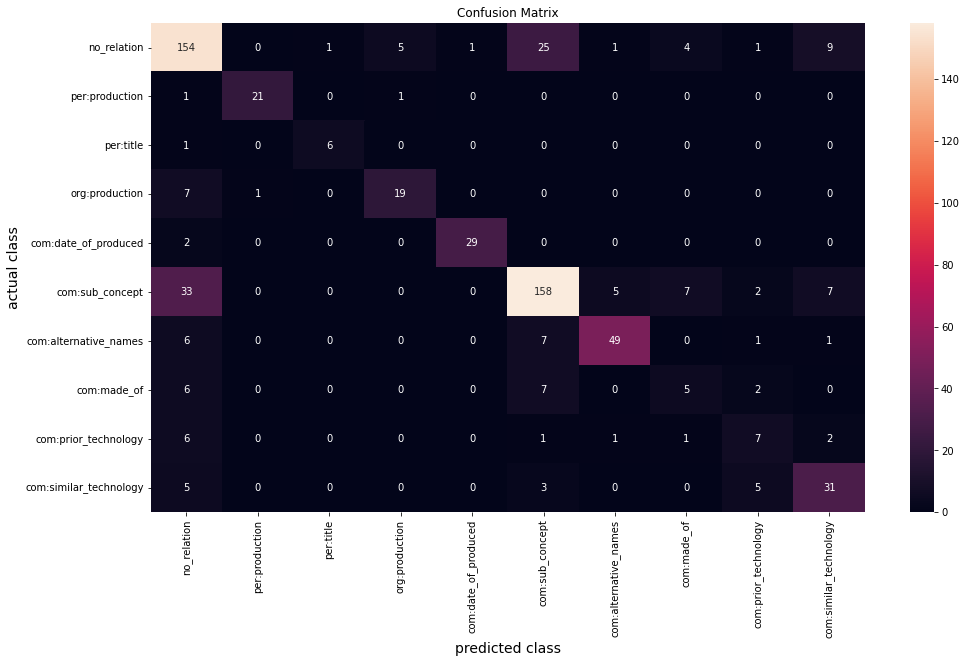

In [17]:
# heatmap으로 예측 결과 확인
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ["no_relation",  "per:production", "per:title","org:production","com:date_of_produced", 
                "com:sub_concept","com:alternative_names", "com:made_of","com:prior_technology", "com:similar_technology"]

plt.figure(figsize = (16,9))

cm = confusion_matrix(data.pred_label,data.answer)

sns.heatmap(cm , annot = True,fmt = 'd',
xticklabels = class_names,
yticklabels = class_names)
plt.title('Confusion Matrix')
plt.xlabel('predicted class', fontsize = 14)
plt.ylabel('actual class' , fontsize = 14)
plt.show()